In [40]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import require
get_oxford_categorical_flagged = require.single( "get_oxford_categorical_flagged" )

def get_data_for_country( country, verbose = True ):

    def plot_all( df, columns = None ):

        if columns is None:

            columns = df.columns
        
        fig, axs = plt.subplots( 1, len( columns ), figsize = ( 4 * len( columns ), 4 ))
        axs = axs.ravel( )
        
        for i, c in enumerate( columns ):
        
            df[ c ].plot( title = c.replace( '_', ' ' ), ax = axs[ i ])

        plt.show( )
    
    if verbose:

        display( HTML( f"<h1>{ country }</h1>" ))
    
    df = pd.read_csv( "data/owid-covid-data.csv", index_col = "date", parse_dates = True, low_memory = False )
    df = df[ df.location == country ]

    # outcomes

    columns = [ "new_cases_smoothed_per_million", "new_deaths_smoothed_per_million", "weekly_hosp_admissions_per_million" ]
    outcome_df = df[ columns ]

    if verbose:

        display( HTML( f"<h3>outcomes</h3>" ))
        plot_all( df, columns )

    # OWID measures

    columns = [ "new_vaccinations_smoothed_per_million", "new_tests_smoothed_per_thousand" ]
    measure_df = df[ columns ].copy( )

    # Oxford measures

    indicators = [ "c6m_stay_at_home_requirements" ]
    dummy_series_per_indicator = { indicator: get_oxford_categorical_flagged( country, indicator, verbose = False ) for indicator in indicators }

    for indicator, dummy_series in dummy_series_per_indicator.items( ):

        for v, series in dummy_series.items( ):

            measure_df[ f"{ indicator }=={ v }" ] = series

    if verbose:

        display( HTML( f"<h3>measures</h3>" ))
        plot_all( measure_df )


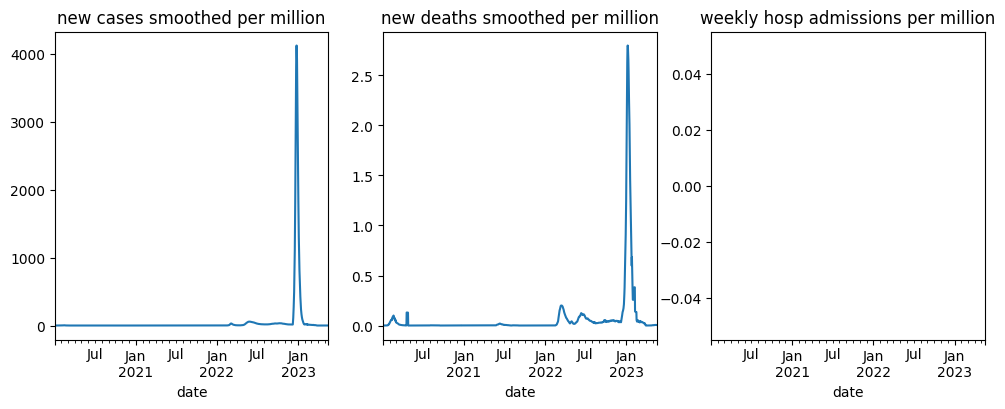

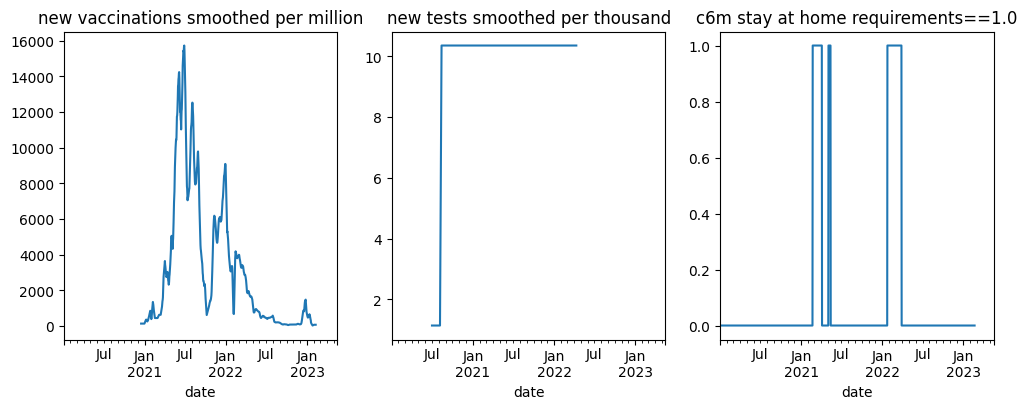

In [45]:
get_data_for_country( "China" )